# Random Gabor experiment

> In this quick experiment we will be training an MNIST classifier using `RandomGabor` layers.

In [1]:
#| hide
%load_ext autoreload
%autoreload 2

## Library importing

In [ ]:
#| hide
import os
os.environ["CUDA_VISIBLE_DEVICES"]="2"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from einops import rearrange, repeat

import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.datasets import mnist

from flayers.layers import RandomGabor

## Data loading

> We will be using MNIST for a simple and quick test.

In [3]:
(X_train, Y_train), (X_test, Y_test) = mnist.load_data()

X_train = repeat(X_train, "b h w ->  b h w c", c=1)/255.0
X_test = repeat(X_test, "b h w ->  b h w c", c=1)/255.0

X_train.shape, Y_train.shape, X_test.shape, Y_test.shape

((60000, 28, 28, 1), (60000,), (10000, 28, 28, 1), (10000,))

## Definition of simple model

In [4]:
model = tf.keras.Sequential([
    RandomGabor(n_gabors=4, size=20, input_shape=(28,28,1)),
    # layers.Conv2D(32, 3, input_shape=(28,28,1)),
    layers.MaxPool2D(2),
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation="softmax")
])
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])
model.summary()

2022-09-06 11:22:17.064899: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 2373 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 780 Ti, pci bus id: 0000:02:00.0, compute capability: 3.5
2022-09-06 11:22:17.065914: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:1 with 151 MB memory:  -> device: 1, name: Tesla K40m, pci bus id: 0000:03:00.0, compute capability: 3.5
2022-09-06 11:22:17.067063: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:2 with 5435 MB memory:  -> device: 2, name: NVIDIA GeForce GTX TITAN Black, pci bus id: 0000:83:00.0, compute capability: 3.5
2022-09-06 11:22:17.068686: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:3 with 5435 MB memory:  -> device: 3, name: NVIDIA GeForce GTX TITAN Black, 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
random_gabor (RandomGabor)   (None, 28, 28, 4)         26        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 4)         0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,876
Trainable params: 7,876
Non-trainable params: 0
_________________________________________________________________


We can show the initial Gabor filters:

2022-09-06 11:22:19.809341: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-09-06 11:22:20.052736: I tensorflow/core/util/cuda_solvers.cc:180] Creating CudaSolver handles for stream 0x563ffaaf38c0


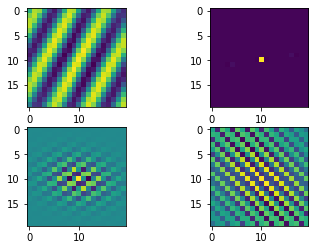

In [5]:
model.layers[0].show_filters()

In [6]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=5)

Epoch 1/5


2022-09-06 11:22:26.673075: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8100
2022-09-06 11:22:27.122762: I tensorflow/core/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


469/469 [==============================] - 18s 28ms/step - loss: 1.2855 - accuracy: 0.7523
Epoch 2/5
469/469 [==============================] - 13s 28ms/step - loss: 0.2952 - accuracy: 0.9105
Epoch 3/5
469/469 [==============================] - 13s 28ms/step - loss: 0.2307 - accuracy: 0.9303
Epoch 4/5
469/469 [==============================] - 13s 28ms/step - loss: 0.1971 - accuracy: 0.9409
Epoch 5/5
469/469 [==============================] - 13s 28ms/step - loss: 0.1745 - accuracy: 0.9478


We can visualize the gabor filters after the training process:

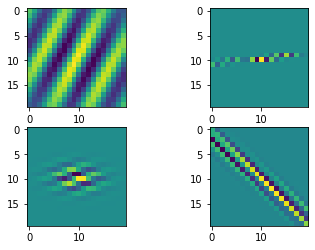

In [7]:
model.layers[0].show_filters()